In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from skimage.util import random_noise

In [2]:
lenna = cv2.imread("Lenna.png", 0)
print(lenna)

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


# Q1

In [3]:
# Gaussian Filter
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma=1, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D

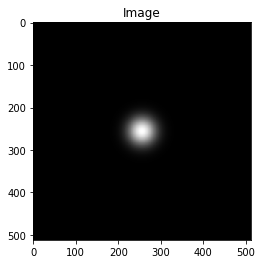

array([[2.57347056e-56, 4.24292753e-56, 6.98168852e-56, ...,
        6.98168852e-56, 4.24292753e-56, 2.57347056e-56],
       [4.24292753e-56, 6.99539148e-56, 1.15108363e-55, ...,
        1.15108363e-55, 6.99539148e-56, 4.24292753e-56],
       [6.98168852e-56, 1.15108363e-55, 1.89409489e-55, ...,
        1.89409489e-55, 1.15108363e-55, 6.98168852e-56],
       ...,
       [6.98168852e-56, 1.15108363e-55, 1.89409489e-55, ...,
        1.89409489e-55, 1.15108363e-55, 6.98168852e-56],
       [4.24292753e-56, 6.99539148e-56, 1.15108363e-55, ...,
        1.15108363e-55, 6.99539148e-56, 4.24292753e-56],
       [2.57347056e-56, 4.24292753e-56, 6.98168852e-56, ...,
        6.98168852e-56, 4.24292753e-56, 2.57347056e-56]])

In [4]:
gaussian_512 = gaussian_kernel(512, math.sqrt(512), True)
gaussian_512

In [5]:
# User defined 1D-FFT
def fft(f):
    M = len(f)
    
    if(M<=1):
        return f
    
    even = f[0::2]
    odd = f[1::2]
    
    G = fft(even)
    H = fft(odd)
    
    #print(G, H, M)
    
    T = []
    #print('H: ', H)
    for i in range(M//2):
        #print(i)
        T.append((np.exp((-2j)*np.pi*i/M))*H[i])
    
    F1 = []
    F2 = []
    for i in range(M//2):
        F1.append(G[i] + T[i])
        F2.append(G[i] - T[i])
    
    F = F1+F2
    #print(F)
    return F

In [6]:
# User defined 1D-IFFT
def ifft(f):
    M = len(f)
    
    if(M<=1):
        return f
    
    even = f[0::2]
    odd = f[1::2]
    
    G = ifft(even)
    H = ifft(odd)
    
    T = []
    for i in range(M//2):
        T.append((np.exp((2j)*np.pi*i/M))*H[i])
    
    F1 = []
    F2 = []
    for i in range(len(H)):
        F1.append(G[i] + T[i])
        F2.append(G[i] - T[i])
    
    F = F1+F2
    return F

In [7]:
# 2D FFT
def fft_2d(img):
    F = []
    
    for i in range(len(img)):
        F.append(fft(img[i]))
    
    for i in range(len(F[0])):
        tmp = []
        for j in range(len(F)):
            tmp.append(F[j][i])
        
        TMP = fft(tmp)
        for j in range(len(F)):
            F[j][i] = TMP[j]
    
#     print("User defined 2D-FFT: ")
#     print(np.array(F))

    return F

In [8]:
# 2D IFFT
def ifft_2d(img):
    F = []
    
    h, w = len(img), len(img[0])
    for i in range(len(img)):
        F.append(ifft(img[i]))
    
    for i in range(len(F[0])):
        tmp = []
        for j in range(len(F)):
            tmp.append(F[j][i])
        
        TMP = ifft(tmp)
        for j in range(len(F)):
            F[j][i] = TMP[j]
    
    for i in range(len(F)):
        for j in range(len(F[i])):
            F[i][j] = F[i][j]/h*w
    
#     print("User defined 2D-IFFT: ")
#     print(F[0])
    F = np.absolute(F)
    return F

512
512


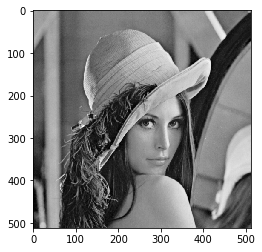

In [9]:
# FFT of Image
lenna_fft = fft_2d(lenna)
print(len(lenna_fft))

lenna_ifft = ifft_2d(lenna_fft)
print(len(lenna_ifft))

plt.imshow(lenna_ifft,cmap='gray')
plt.show()

In [10]:
# FFT of Gaussian filter
gaussian_fft = fft_2d(gaussian_512)
print(len(gaussian_fft))

gaussian_ifft = ifft_2d(gaussian_fft)
print(len(gaussian_ifft))

print(gaussian_ifft)

512
512
[[2.22702813e-12 5.31024326e-12 1.53667858e-12 ... 7.44361543e-12
  1.04937707e-12 1.98378780e-12]
 [6.75643576e-12 9.60898912e-12 5.30851502e-12 ... 3.01685558e-12
  5.54520490e-12 2.65021287e-12]
 [9.11011077e-12 1.18219128e-11 7.56730857e-12 ... 1.53016268e-12
  7.95136784e-12 5.06545096e-12]
 ...
 [3.56310554e-12 6.88917103e-12 2.29209209e-12 ... 5.77772179e-12
  2.46732889e-12 7.52841383e-13]
 [7.66384800e-12 1.10867820e-11 6.69624849e-12 ... 4.99466297e-12
  6.21352282e-12 3.85337160e-12]
 [2.39176288e-12 3.80222127e-12 8.86286398e-13 ... 8.50804879e-12
  3.14342866e-12 4.18042656e-12]]


In [11]:
# h = np.fft.fft2(h, f.shape)
# f = np.fft.fft2(f)
# f = f*h
# f = np.fft.ifft2(f).real

f = np.fft.fft2(lenna)
h = np.fft.fft2(gaussian_512)
f = f*h
f

array([[ 1.11296634e+11+0.00000000e+00j,  1.44958462e+09-6.66933312e+09j,
         4.22474390e+09-3.21683989e+09j, ...,
         6.45620533e+08+1.21787197e+09j,  4.22474390e+09+3.21683989e+09j,
         1.44958462e+09+6.66933312e+09j],
       [-1.17244680e+08+3.86930908e+09j, -4.96048688e+09+4.22445533e+09j,
         2.74046944e+09-7.31879005e+08j, ...,
         1.28814918e+09+1.50041530e+09j,  8.46392240e+08-1.40800488e+09j,
         2.46078034e+08+2.21868999e+09j],
       [-1.01217406e+09-7.25032520e+08j,  7.18711496e+08+2.68765454e+08j,
         1.43439766e+09-9.49266965e+08j, ...,
        -6.43335868e+08-1.62533072e+09j, -1.51274730e+09-3.28440530e+08j,
        -1.88627823e+09+1.09047497e+08j],
       ...,
       [-1.13600682e+09+4.07731242e+08j,  1.50287751e+09+1.42518284e+09j,
         8.80856858e+08+3.76697376e+08j, ...,
         1.52269147e+09+1.59329672e+08j, -2.61721823e+08+1.38035231e+09j,
        -2.04501157e+08+1.35379753e+09j],
       [-1.01217406e+09+7.25032520e+08j, -1.

# Q1

In [12]:
# Forming g(x, y)=f(x, y)*h(x, y)
lenna_fft_arr = np.array(lenna_fft)
gaussian_fft_arr = np.array(gaussian_fft)

g = lenna_fft_arr*gaussian_fft_arr
g

array([[ 1.11296634e+11+0.00000000e+00j,  1.44958462e+09-6.66933312e+09j,
         4.22474390e+09-3.21683989e+09j, ...,
         6.45620533e+08+1.21787197e+09j,  4.22474390e+09+3.21683989e+09j,
         1.44958462e+09+6.66933312e+09j],
       [-1.17244680e+08+3.86930908e+09j, -4.96048688e+09+4.22445533e+09j,
         2.74046944e+09-7.31879005e+08j, ...,
         1.28814918e+09+1.50041530e+09j,  8.46392240e+08-1.40800488e+09j,
         2.46078034e+08+2.21868999e+09j],
       [-1.01217406e+09-7.25032520e+08j,  7.18711496e+08+2.68765454e+08j,
         1.43439766e+09-9.49266965e+08j, ...,
        -6.43335868e+08-1.62533072e+09j, -1.51274730e+09-3.28440530e+08j,
        -1.88627823e+09+1.09047497e+08j],
       ...,
       [-1.13600682e+09+4.07731242e+08j,  1.50287751e+09+1.42518284e+09j,
         8.80856858e+08+3.76697376e+08j, ...,
         1.52269147e+09+1.59329672e+08j, -2.61721823e+08+1.38035231e+09j,
        -2.04501157e+08+1.35379753e+09j],
       [-1.01217406e+09+7.25032520e+08j, -1.

In [13]:
for i in range(len(gaussian_fft_arr)):
    for j in range(len(gaussian_fft_arr[i])):
        if((gaussian_fft_arr[i][j])==0+0j):
            gaussian_fft_arr[i][j] = 0.01+0j

[[ 3.47150210e+07      +0.j         -4.56574842e+05+2164544.56601674j
   1.52208185e+06-1188744.34545086j ... -2.74594442e+05 -541856.23885154j
   1.52208185e+06+1188744.34545086j -4.56574842e+05-2164544.56601674j]
 [ 3.03060258e+04-1254352.11868502j -1.65318041e+06+1443256.09933483j
  -1.03047308e+06 +295625.94086566j ...  5.81429005e+05 +694299.50189837j
  -3.23146799e+05 +530172.14398945j  8.28827982e+04 +747288.29705214j]
 [-3.71339693e+05 -259159.6100419j  -2.73455353e+05  -96560.84121478j
   5.98253549e+05 -417384.05377513j ...  3.25457890e+05 +837215.92343231j
  -6.41543938e+05 -139288.98145976j  7.12638499e+05  -45587.21465757j]
 ...
 [ 5.03855090e+05 -170439.65910213j  6.80178798e+05 +661056.25759734j
  -4.51446673e+05 -196345.92584117j ...  9.43802904e+05 +134035.4765524j
   1.56184977e+05 -704857.7166025j  -1.08837489e+05 +617483.84937095j]
 [-3.71339693e+05 +259159.6100419j   7.12638499e+05  +45587.21465757j
  -6.41543938e+05 +139288.98145975j ... -5.14121296e+05 -698288.44

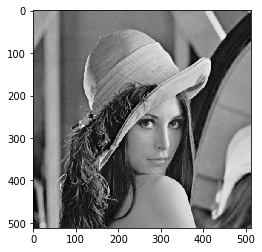

In [14]:
ans = g/gaussian_fft_arr
print(ans)

f_1 = ifft_2d(ans)
print(f_1)

plt.imshow(f_1,cmap='gray')
plt.show()

# Q2

In [15]:
def s_p_noise(image):
    row,col = image.shape
    s_vs_p = 0.05
    amount = 0.004
    out = np.zeros((row, col))
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    
    out[tuple(coords)] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
    out[tuple(coords)] = 0
    
    return out

n = s_p_noise(lenna)
print(n)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
# Forming g(x, y)=f(x, y)*h(x, y)
lenna_fft_arr = np.array(lenna_fft)
gaussian_fft_arr = np.array(gaussian_fft)

noise_fft = fft_2d(n)
noise_fft_arr = np.array(noise_fft)

In [17]:
g_temp = lenna_fft_arr*gaussian_fft_arr

g2 = g_temp + noise_fft

In [18]:
for i in range(len(gaussian_fft_arr)):
    for j in range(len(gaussian_fft_arr[i])):
        if((gaussian_fft_arr[i][j])==0+0j):
            gaussian_fft_arr[i][j] = 0.01+0j

[[ 3.47150210e+07      +0.j         -4.56574843e+05+2164544.56743002j
   1.52208185e+06-1188744.34492197j ... -2.74594443e+05 -541856.24066221j
   1.52208185e+06+1188744.34492197j -4.56574843e+05-2164544.56743002j]
 [ 3.03060283e+04-1254352.1210772j  -1.65318041e+06+1443256.09793809j
  -1.03047308e+06 +295625.9410997j  ...  5.81429009e+05 +694299.5037686j
  -3.23146794e+05 +530172.14076044j  8.28827985e+04 +747288.29805305j]
 [-3.71339692e+05 -259159.61051596j -2.73455354e+05  -96560.83988851j
   5.98253547e+05 -417384.04997287j ...  3.25457892e+05 +837215.92428229j
  -6.41543936e+05 -139288.98322083j  7.12638499e+05  -45587.21356466j]
 ...
 [ 5.03855087e+05 -170439.65905084j  6.80178792e+05 +661056.25715108j
  -4.51446670e+05 -196345.92577082j ...  9.43802908e+05 +134035.47867982j
   1.56184977e+05 -704857.71831315j -1.08837490e+05 +617483.84633622j]
 [-3.71339692e+05 +259159.61051596j  7.12638499e+05  +45587.21356466j
  -6.41543936e+05 +139288.98322083j ... -5.14121300e+05 -698288.45

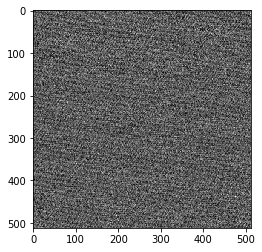

In [19]:
# Without subtracting noise and dividing
ans2 = g2/gaussian_fft_arr
print(ans2)

f_2 = ifft_2d(ans2)
print(f_2)

plt.imshow(f_2,cmap='gray')
plt.show()

[[ 3.47150210e+07      +0.j         -4.56574842e+05+2164544.56601674j
   1.52208185e+06-1188744.34545086j ... -2.74594442e+05 -541856.23885154j
   1.52208185e+06+1188744.34545086j -4.56574842e+05-2164544.56601674j]
 [ 3.03060258e+04-1254352.11868502j -1.65318041e+06+1443256.09933483j
  -1.03047308e+06 +295625.94086566j ...  5.81429005e+05 +694299.50189837j
  -3.23146799e+05 +530172.14398945j  8.28827982e+04 +747288.29705214j]
 [-3.71339693e+05 -259159.6100419j  -2.73455353e+05  -96560.84121478j
   5.98253549e+05 -417384.05377513j ...  3.25457890e+05 +837215.92343231j
  -6.41543938e+05 -139288.98145976j  7.12638499e+05  -45587.21465757j]
 ...
 [ 5.03855090e+05 -170439.65910213j  6.80178798e+05 +661056.25759734j
  -4.51446673e+05 -196345.92584117j ...  9.43802904e+05 +134035.4765524j
   1.56184977e+05 -704857.7166025j  -1.08837489e+05 +617483.84937095j]
 [-3.71339693e+05 +259159.6100419j   7.12638499e+05  +45587.21465757j
  -6.41543938e+05 +139288.98145975j ... -5.14121296e+05 -698288.44

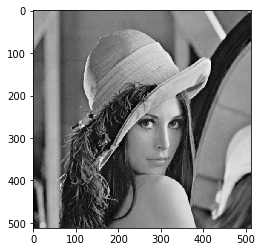

In [20]:
# Subtracting noise and dividing
ans_temp = g2 - noise_fft_arr
ans2 = ans_temp/gaussian_fft_arr
print(ans2)

f_2 = ifft_2d(ans2)
print(f_2)

plt.imshow(f_2,cmap='gray')
plt.show()

# Done